In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
airlines=pd.read_excel(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Assignments\Clustering\EastWestAirlines.xlsx",sheet_name='data')
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airlines.shape

(3999, 12)

In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


There is no any null value and all data types also valid

In [5]:
airlines=airlines.rename({'Award?':'Award'},axis=1)
airlines=airlines.rename({'ID#':'ID'},axis=1)
airlines.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


Normalizing data

In [6]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [7]:
airlines_norm=norm_func(airlines.iloc[:,1:])
airlines_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


Building Agglomerative Clustering model

In [8]:
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
y_hc=hc.fit_predict(airlines_norm)

In [9]:
clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [10]:
clusters

,clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [11]:
clusters.value_counts()

clusters
1           2518
0           1479
2              1
3              1
dtype: int64

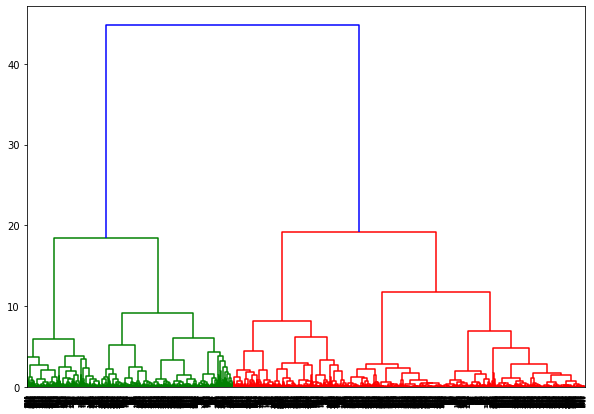

In [12]:
figure=plt.figure(figsize=(10,7))
dendogram=sch.dendrogram(sch.linkage(airlines_norm,method='ward'))

Now we will perform KMeans clustering.

In [13]:
model=KMeans(n_clusters=4)
model.fit(airlines_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
model.labels_

array([2, 2, 2, ..., 3, 2, 2])

In [15]:
md=pd.Series(model.labels_)
airlines['clust']=md

In [16]:
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [17]:
airlines.iloc[:,1:12].groupby(airlines.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clust,,,,,,,,,,,
0,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0
3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0


In [18]:
airlines['clust'].value_counts()

2    1897
3     808
1     673
0     621
Name: clust, dtype: int64

Cluster1 having more no of clients.they have low balance and low bonus miles that means they are not frequent filers.also they have travel least in last 12 months.
cluster4 having minimum clients than all other clusters.they are having more balance and bonus miles is also more.that means they have travelled more.but they travel less in last 12 months.
cluster2 and 3 contain average clients.they are having average balance and bonus.they also travelled more in last 12 months.

For the non-frequent flyers who are more in numbers promotions like more miles per fly, discounted air fare rates can be offered to improve the number of flyers. This offers would help customers to fly frequently. Most of the customers in this cluster did not fly in last 12 months.

DBSACN Clustering

In [19]:
dbmodel=DBSCAN(eps=0.3,min_samples=13)
dbmodel.fit(airlines_norm)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=13, n_jobs=None, p=None)

In [20]:
dbmodel.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
cl=pd.DataFrame(dbmodel.labels_,columns=['cluster_dbscan'])

In [22]:
airlines=pd.concat([airlines,cl],axis=1)

In [23]:
airlines.iloc[:,1:12].groupby(airlines.cluster_dbscan).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_dbscan,,,,,,,,,,,
-1,213231.421569,1853.058824,2.627451,1.421569,1.450980,52127.235294,27.323529,3045.931373,9.372549,4732.754902,0.686275
0,58805.728045,65.385269,1.700931,1.000000,1.000809,9902.830838,8.974504,221.218130,0.624039,3819.958721,0.000000
1,89783.094259,159.982282,2.657690,1.000000,1.000709,27385.418852,15.046067,694.080794,2.114812,4601.425939,1.000000
2,39280.266667,0.000000,1.000000,2.000000,1.000000,8969.400000,13.533333,206.666667,0.733333,3709.866667,0.000000


In [24]:
airlines['cluster_dbscan'].value_counts()

 0    2471
 1    1411
-1     102
 2      15
Name: cluster_dbscan, dtype: int64

102 outliers are present